In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [120]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Dealing with outliers

C:\Users\DELL\AppData\Local\Temp\ipykernel_16716\2460615548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


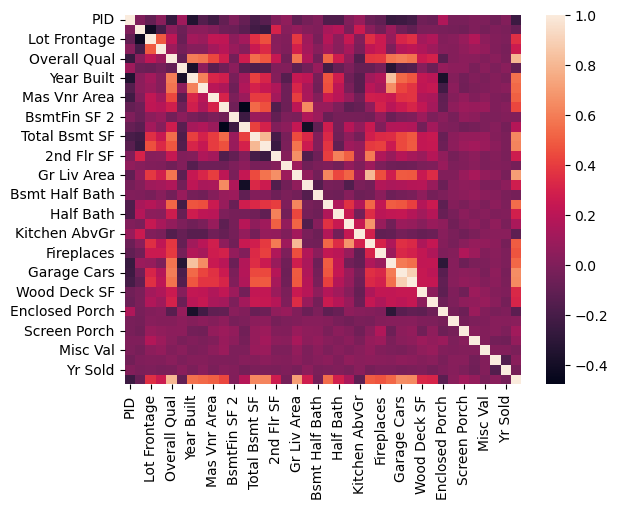

In [121]:
sns.heatmap(df.corr());

C:\Users\DELL\AppData\Local\Temp\ipykernel_16716\792021587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"]);


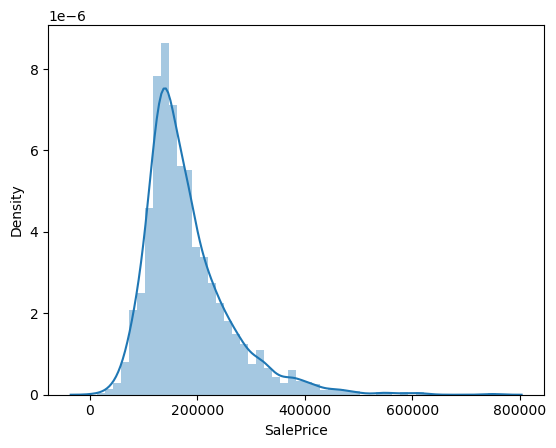

In [122]:
sns.distplot(df["SalePrice"]);

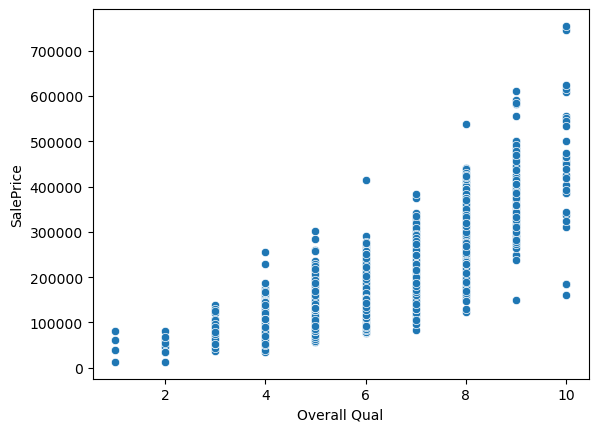

In [123]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [124]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


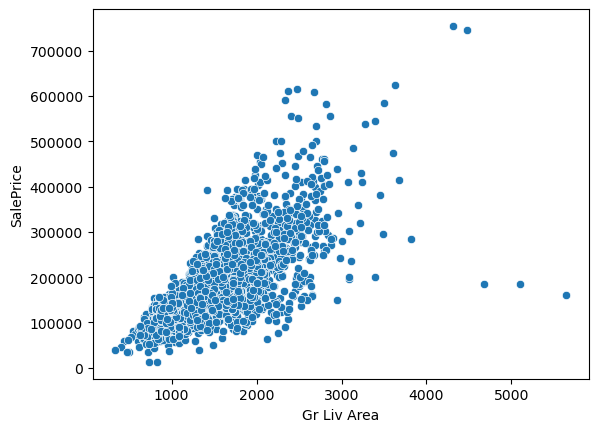

In [125]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

In [126]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [127]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [128]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [129]:
df = df.drop(ind_drop,axis=0)

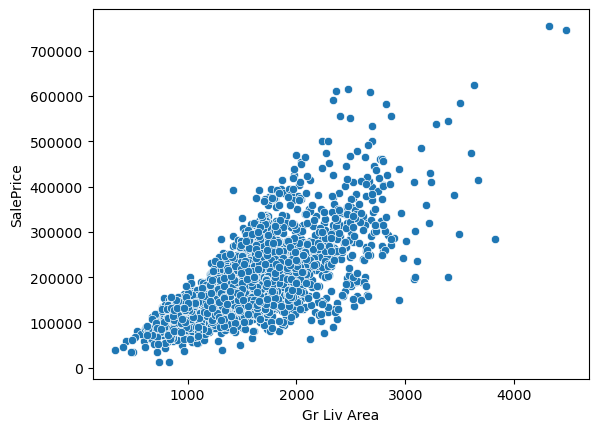

In [130]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

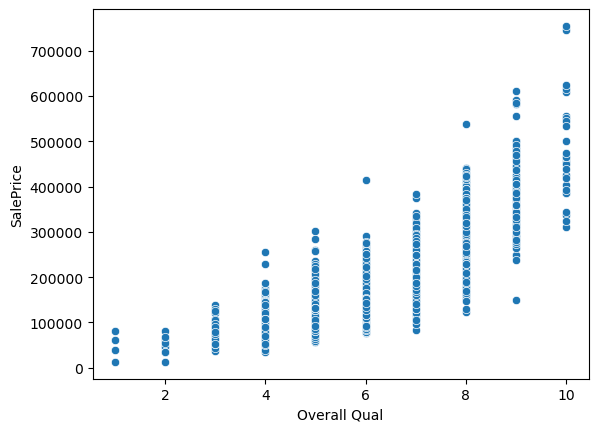

In [131]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

### Dealing with missing data

In [42]:
len(df.columns)

81

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [44]:
df = df.drop('PID',axis=1)

In [45]:
len(df.columns)

80

#### Observing NaN values

In [48]:
#df.isnull()

In [49]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [50]:
100* df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [51]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [52]:
percent_nan = percent_missing(df)

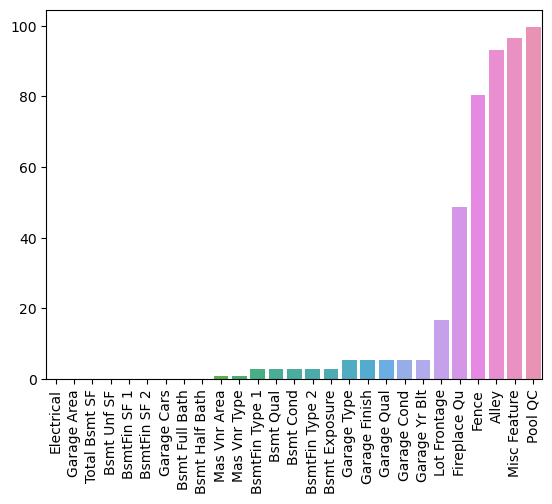

In [53]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

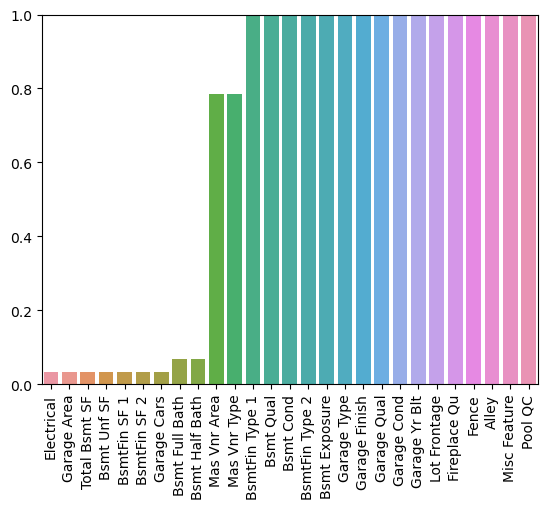

In [54]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

In [55]:
# Could also imply we should ex
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [56]:
100/len(df)

0.0341646737273659

In [57]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [58]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [59]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [60]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [61]:
percent_nan = percent_missing(df)

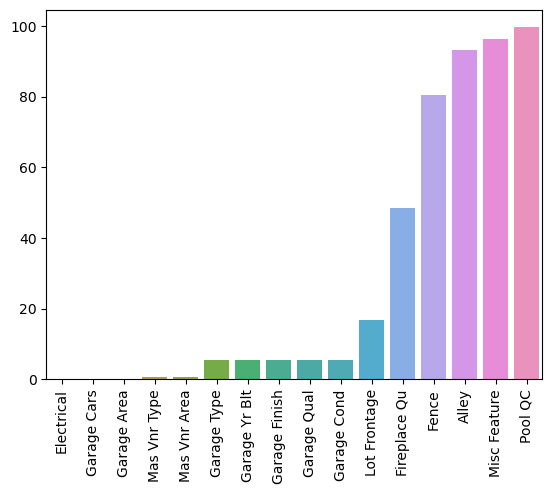

In [62]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [63]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [65]:
percent_nan = percent_missing(df)

(0.0, 1.0)

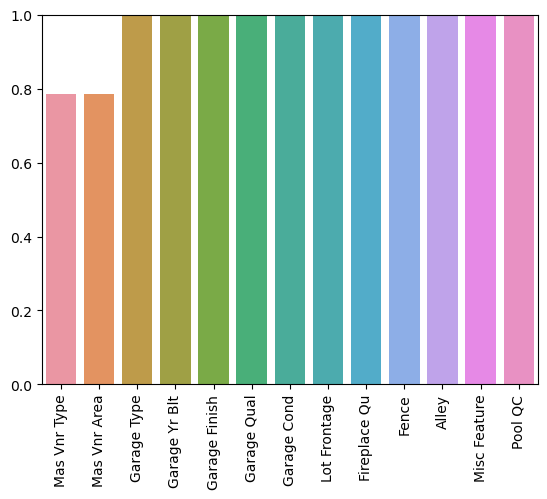

In [66]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [67]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [68]:
percent_nan = percent_missing(df)

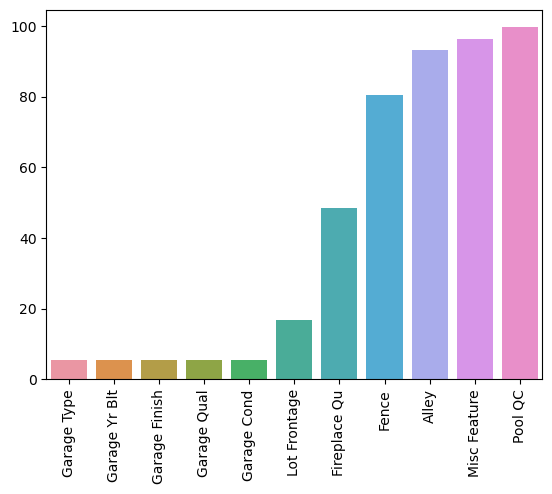

In [69]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [70]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [71]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [72]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [73]:
percent_nan = percent_missing(df)

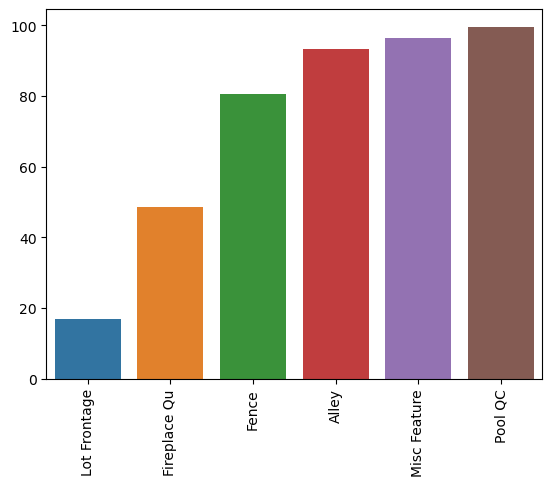

In [74]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#### Dropping feature columns

In [75]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [76]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [77]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [78]:
percent_nan = percent_missing(df)

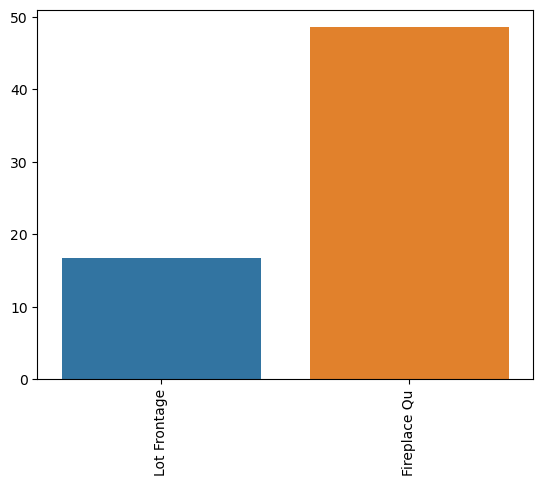

In [79]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [80]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [81]:
percent_nan = percent_missing(df)

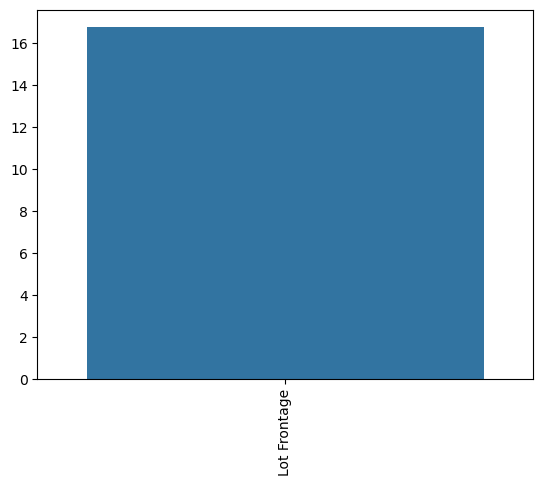

In [82]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [83]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

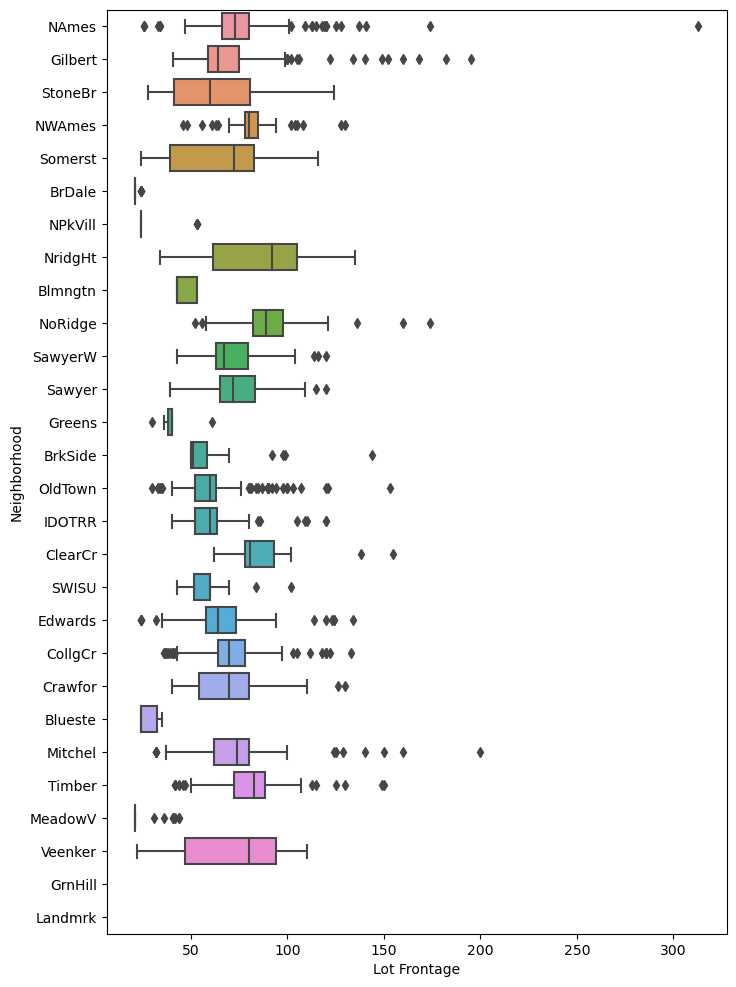

In [85]:
plt.figure(figsize=(8,12));
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h');

In [86]:
df.groupby('Neighborhood')['Lot Frontage']

In [87]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [88]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [89]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [90]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

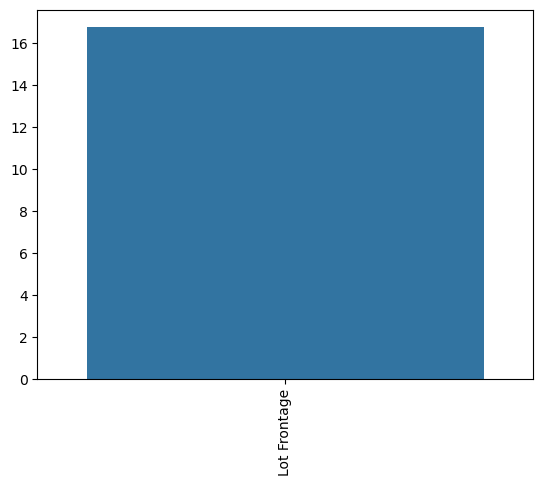

In [91]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [92]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [93]:
percent_nan = percent_missing(df)

In [94]:
percent_nan

Series([], dtype: float64)

#### Numerical column to categorical


In [96]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [101]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [102]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [103]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [104]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

In [105]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [107]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [108]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [109]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

In [132]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(238)
memory usage: 1.5 MB


In [133]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [139]:
from sklearn.linear_model import ElasticNet

In [140]:
base_elastic_model = ElasticNet()

In [141]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [142]:
from sklearn.model_selection import GridSearchCV

In [144]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [145]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+11, tolerance: 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.559e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.707e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+11, tolerance: 

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [146]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [147]:
y_pred = grid_model.predict(scaled_X_test)

In [148]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [152]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

14195.354900562172

In [153]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

20558.508566893175

In [154]:
sales_mean = np.mean(df['SalePrice'])
sales_mean

180800.7707550393

In [155]:
MAE*100/sales_mean

7.851379638085153

In [156]:
RMSE*100/sales_mean

11.370808034190954